# Đồ Án Cuối Kì : Khoa Học Dữ Liệu ( The Global 2000 - 2022 )
Nhóm sinh viên thực hiện : 

21424068 - Nguyễn Nguyên Văn

21424004 - Nguyễn Thành Đạt

21424061 - Nguyễn Minh Trọng Trí


### Đầu tiên ta thêm các thư viện cũng như import các thư viện cần thiết

In [ ]:
!pip install scrapy
!pip install spider3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 277.2/277.2 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 46.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.9/92.9 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.9/57.9 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 5.9 MB/s eta 0:00:00
ERROR: Operation cancelled by user
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [225]:
import json
import re
import pandas as pd
# import scrapy
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
# from scrapy.selector import Selector

Như mọi người cũng đã biết nhu cầu toàn cầu hoá kinh tế là hết sức quan trọng đối với các công ty đa quốc gia, tập đoàn lớn. Vậy các công ty, <b>các tập đoàn đó là gì?</b> </br>
Chúng ta sẽ thu thập số liệu các công ty đó và <b>đánh giá yếu tố </b> nào đánh giá một công ty, tập đoàn lớn mạnh.</br>


### Tạo project scrapy

In [ ]:
!scrapy startproject fobes_companies_crawler

In [ ]:
cd /content/fobes_companies_crawler/fobes_companies_crawler/spiders

## Thu thập dữ liệu
Chúng ta sẽ tạo file .py cần thiết và tiến hành thu thập dữ liệu</br>
Dữ liệu chúng ta thu thập ở https://www.forbes.com/lists/global2000 đây là một trang báo tương đối uy tín rất đáng tin cậy.

In [ ]:
!scrapy crawl get_company -O dataset/get_company.json

## Tiền xử lý dữ liệu
Sau khi đã có dữ liệu ta tiến hành chuyển thành dataframe để dễ dàng xử lý.

In [226]:
df_company = pd.read_json("/content/get_company.json")

Kiểm tra dữ liệu có mấy `hàng` mấy `cột`

In [227]:
df_company.shape

(2000, 7)

Show `dữ liệu` top 10 để xem trước dữ liệu có vấn đề gì không.

In [228]:
df_company.head(10)

,Rank,Name,Country,Sales,Profits,Assets,Market value
0,1,Berkshire Hathaway,United States,$276.09 B,$89.8 B,$958.78 B,$741.48 B
1,2,ICBC,China,$208.13 B,$54.03 B,"$5,518.51 B",$214.43 B
2,3,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,$400.38 B,$105.36 B,$576.04 B,"$2,292.08 B"
3,4,JPMorgan Chase,United States,$124.54 B,$42.12 B,"$3,954.69 B",$374.45 B
4,5,China Construction Bank,China,$202.07 B,$46.89 B,"$4,746.95 B",$181.32 B
5,6,Amazon,United States,$469.82 B,$33.36 B,$420.55 B,"$1,468.4 B"
6,7,Apple,United States,$378.7 B,$100.56 B,$381.19 B,"$2,640.32 B"
7,8,Agricultural Bank of China,China,$181.42 B,$37.38 B,"$4,561.05 B",$133.38 B
8,9,Bank of America,United States,$96.83 B,$31 B,"$3,238.22 B",$303.1 B
9,10,Toyota Motor,Japan,$281.75 B,$28.15 B,$552.46 B,$237.73 B





#### Set Index
Trước tiên ta để cột `Rank` trở thành index của `df_company`



In [229]:
df_company = df_company.set_index("Rank")
df_company.head()

,Name,Country,Sales,Profits,Assets,Market value
Rank,,,,,,
1,Berkshire Hathaway,United States,$276.09 B,$89.8 B,$958.78 B,$741.48 B
2,ICBC,China,$208.13 B,$54.03 B,"$5,518.51 B",$214.43 B
3,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,$400.38 B,$105.36 B,$576.04 B,"$2,292.08 B"
4,JPMorgan Chase,United States,$124.54 B,$42.12 B,"$3,954.69 B",$374.45 B
5,China Construction Bank,China,$202.07 B,$46.89 B,"$4,746.95 B",$181.32 B


#### Ý nghĩa từng cột trong DataFrame
- Theo dữ liệu năm 2022
  - Cột `Rank` : Thứ hạng của các công ty
  - Cột `Name` : Tên của các công ty
  - Cột `Revenue` : Doanh thu của các công ty trong năm
  - Cột `Assets` : Tổng tài sản của các công ty 
  - Cột `Profits` : Lợi nhuận của các công ty trong năm
  - Cột `Market Value` : Giá trị Cng ty đạt được theo định giá trị thị trường (thông qua cổ phiếu)

#### Ý nghĩa của dòng 
- Mỗi 1 dòng trong DataFrame thể hiện <b>doanh thu, tổng tài sản, lợi nhuận, giá trị thị trường</b> trong năm đang xét của một công ty.
- Với giá trị đang xét thông thường sẽ là $B$ (tỉ đô-la), nhưng vẫn có trường đạt $T$( nghìn tỉ đô) và cũng có trường đạt $M$ ( Triệu đô), vì vậy ta cần chuẩn hoá về 1 giá trị ( ta chuẩn hoá về $B$)

Tiếp tục xử lý các giá trị như đã nói ở trên

In [230]:

def transform_cost(value):
    data = value.replace(",","")
    if data[-1] == 'M':  # Triệu chia 1000
      return np.float64(data[1:-2])/1000
    elif data[-1] == 'T': # Nghìn tỷ nhân 1000
      return np.float64(data[1:-2])*1000
    elif data[-1] == 'B':
      return np.float64(data[1:-2])
    return None


In [231]:
df_company["Sales"] = df_company["Sales"].apply(transform_cost)
df_company["Profits"] = df_company["Profits"].apply(transform_cost)
df_company["Assets"] = df_company["Assets"].apply(transform_cost)
df_company["Market value"] = df_company["Market value"].apply(transform_cost)

Đổi tên cột theo phương thức đã nói ở trên

In [232]:
df_company.rename(columns = {'Sales':'Sales (B$)', 'Profits':'Profits (B$)','Assets' : 'Assets (B$)' , 'Market value' : 'Market value (B$)'}, inplace = True)

In [233]:
df_company.head()

,Name,Country,Sales (B$),Profits (B$),Assets (B$),Market value (B$)
Rank,,,,,,
1,Berkshire Hathaway,United States,276.09,89.80,958.78,741.48
2,ICBC,China,208.13,54.03,5518.51,214.43
3,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,400.38,105.36,576.04,2292.08
4,JPMorgan Chase,United States,124.54,42.12,3954.69,374.45
5,China Construction Bank,China,202.07,46.89,4746.95,181.32


**Tổng quan dữ liệu**

Ta xem tổng quan dữ liệu thử có đủ dữ liệu hay không, `xem thử giá trị trung bình, độ lệch chuẩn, giá trị nhỏ nhất, lớn nhất cũng như bộ tứ phân vị của dữ liệu`


In [234]:
df_company.describe()# count = 2000

,Sales (B$),Profits (B$),Assets (B$),Market value (B$)
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,23.875905,2.502110,117.124169,38.252432
std,40.943971,6.159208,363.742939,117.204585
min,0.000000,-12.050000,0.166000,0.144000
25%,5.607500,0.590000,14.797500,7.330000
50%,12.170000,1.055000,32.010000,16.645000
75%,23.725000,2.270000,77.870000,34.710000
max,572.750000,105.360000,5518.510000,2640.320000


Có vẻ dữ liệu của chúng ta đầy đủ (count = 2000)

Tuy nhiên độ lệch của các công ty cũng khá lớn ✌

## Câu hỏi từ dữ liệu.

###Đặt câu hỏi 
Sau khi khám phá dữ liệu, ta đã hiểu hơn về dữ liệu. Bây giờ, ta hãy xem thử có câu hỏi nào có thể được trả lời bằng dữ liệu này.

####Câu 1 
Tôi muốn khởi nghiệp, hoặc có ý định muốn mở rộng thì trường vậy tôi cần biết **các công ty lớn thường phân bố** ở đâu ?

Phân bố của các công ty lớn sẽ được tính là tỉ số phần trăm công ty của các quốc gia với nhau.



**Trả lời được câu hỏi này sẽ** ta sẽ biết được quốc gia, khu vực nào đang có nhiều công ty, và chiếm tỷ trọng bao nhiêu để dể dàng đầu tư 😀

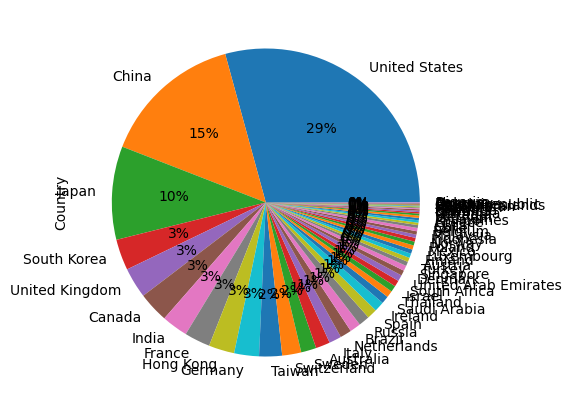

In [235]:
plot = df_company.Country.value_counts().plot.pie( y='mass',autopct='%1.00f%%', figsize=(5, 5))

Có vẻ như biểu đồ không trực quan lắm nên ta gộp lại, các khu vực dưới 2,5% làm khu vực khác đê dễ nhìn hơn.

Đầu tiên ta tạo 1 `DataFrame` cột `Country` ta đếm quốc gia và lấy `index` đó thôi và xét nó làm cột `index`.</br>
Cột `Count` ta đếm quốc gia tương tự cột `Country` nhưng lần này ta lấy `value`, vậy ta có các quốc gia và số lượng đếm tương ứng.</br>
Vì có quá nhiều quốc gia nên những quốc gia có **ít hơn 50** công ty thì ta gọi nó là `Other countries`</br>
Và ta có biểu đồ sau.

In [236]:
pie_chart = pd.DataFrame({'Country': df_company.Country.value_counts().index,'Count': df_company.Country.value_counts().values})
pie_chart.set_index("Country")

pie_chart.loc[pie_chart.Count < 50, 'Country'] = 'Other countries'
fig = px.pie(pie_chart, values='Count', names='Country', title='Percent % Country of Company')
fig.show()

#####Nhận Xét
Ta dễ dàng nhìn thấy khu vực `United States` chiếm tỷ trọng cao nhất khoảng **29.3%** tiếp theo là Trung Quốc với khoảng **14.8%**, tiếp đó là Nhật với khoảng **9.8%**.

####Câu 2 
**Giá trị thị trường đạt được của từng khu vực là bao nhiêu tiền** ?</br>
**Trả lời được câu hỏi này sẽ** các nhà đầu từ có cái nhìn tổng quan giá trị thị trường ở từng khu vực để họ xem xét định hướng đầu tư hoặc hợp tác trong tương lai.

Đầu tiên ta tạo 1 `DataSet` bằng cách group theo `Country` và lấy dữ liệu cột `Market value (B$)` để tính tổng lại theo `Country` đồng thời sắp xếp lại `DataSet` này.</br>
Sau đó chuyển về lại `DataFrame` để ta `group` và vẽ biểu đồ dễ hơn</br>

Vì có quá nhiều quốc gia nên những quốc gia có **ít hơn 1500.000 B** vốn hóa thị trường thì ta gọi nó là `Other countries`</br>
Sau đó vẽ biểu đồ dựa trên số liệu sẵn có.

In [237]:
group_by_country_market = df_company.groupby('Country')['Market value (B$)'].sum().sort_values(ascending=False)

group_by_country_market = pd.DataFrame({'Country': group_by_country_market.index,'Total Value Market': group_by_country_market.values})
group_by_country_market.set_index("Country")


group_by_country_market.loc[group_by_country_market['Total Value Market'] < 1500.000, 'Country'] = 'Other countries'
fig2 = px.bar(group_by_country_market, x='Country', y='Total Value Market', title="Market Value to Country")
fig2.show()


##### Nhận xét 
Khu vực nước Mỹ được đánh giá thị trường rất cao với `38213.622 B` vốn hóa thị trường thế giới, trong khi Trung Quốc chỉ đạt `6839.276 B` nhưng đây cũng là 1 thị trường tiềm năng. Đặc biệt ở `Saudi Arabia` cũng lọt vào top này với phần lớn vốn hóa thuộc về **1 công ty** 😃 </br>
Giá trị công ty đó

In [238]:
df_company.iloc[2]

Name                 Saudi Arabian Oil Company (Saudi Aramco)
Country                                          Saudi Arabia
Sales (B$)                                             400.38
Profits (B$)                                           105.36
Assets (B$)                                            576.04
Market value (B$)                                     2292.08
Name: 3, dtype: object

####Câu 3 
**Khu vực nào mang lại tiền nhiều nhất ?**
 **Trả lời được câu hỏi này sẽ** các nhà hoạch định chính sách cũng như đầu tư sẽ biết tiềm năng phát triển của từng khu vực để dự định đầu tư.

Đầu tiên ta tạo 1 `DataSet` bằng cách group theo `Country` và lấy dữ liệu cột `Sales (B$)` để tính tổng lại theo `Country` đồng thời sắp xếp lại `DataSet` này.</br>
Sau đó chuyển về lại `DataFrame` để ta `group` và vẽ biểu đồ dễ hơn</br>

Vì có quá nhiều quốc gia nên những quốc gia có **ít hơn 1000.000 B** thu nhập thì ta gọi nó là `Other countries`</br>
Sau đó vẽ biểu đồ dựa trên số liệu sẵn có.

In [239]:
group_by_country_sales = df_company.groupby('Country')['Sales (B$)'].sum().sort_values(ascending=False)
group_by_country_sales = pd.DataFrame({'Country': group_by_country_sales.index,'Total Sales': group_by_country_sales.values})
group_by_country_sales.set_index("Country")

group_by_country_sales.loc[group_by_country_sales['Total Sales'] < 1000.000, 'Country'] = 'Other countries'
fig3 = px.bar(group_by_country_sales, x='Country', y='Total Sales', title="Sales to Country")

fig3.show()

####Câu 4
**Top những công ty nằm trong khu vực thuộc top 20 ?**</br>
 **Trả lời được câu hỏi này sẽ** chúng ta sẽ biết tiềm năng của quốc gia, khu vực đó để sẵn sàng định hướng trong tương lai.

Đầu tiên ta tạo 1 `DataFrame` cột `Country` ta đếm quốc gia và lấy `index` đó thôi và xét nó làm cột `index` (ta lấy top 20 nên chỉ lấy tới top 20 thôi).</br>
Cột `Count` ta đếm quốc gia tương tự cột `Country` nhưng lần này ta lấy `value`, vậy ta có các quốc gia và số lượng đếm tương ứng.</br>

Và ta có biểu đồ sau.

In [240]:
top20 = pd.DataFrame({'Country': df_company.Country[:20].value_counts().index,'Count': df_company.Country[:20].value_counts().values})
top20.set_index("Country")

fig4 = px.pie(top20, values='Count', names='Country', title='Percent % Country of Company in Top 20', hole=.2)
fig4.show()

####Câu 5
**Khu vực nào mang lại tiền nhiều nhất ?**
 **Trả lời được câu hỏi này sẽ** các nhà hoạch định chính sách cũng như đầu tư sẽ biết tiềm năng phát triển của từng khu vực để dự định đầu tư.

Đầu tiên ta tạo 1 `DataSet` bằng cách group theo `Country` và lấy dữ liệu cột `Assets (B$)` để tính tổng lại theo `Country` đồng thời sắp xếp lại `DataSet` này.</br>
Sau đó chuyển về lại `DataFrame` để ta `group` và vẽ biểu đồ dễ hơn</br>

Vì có quá nhiều quốc gia nên những quốc gia có **ít hơn 5000.000 B** thu nhập thì ta gọi nó là `Other countries`</br>
Sau đó vẽ biểu đồ dựa trên số liệu sẵn có.

In [241]:
group_by_country_Assets = df_company.groupby('Country')['Assets (B$)'].sum().sort_values(ascending=False)
group_by_country_Assets = pd.DataFrame({'Country': group_by_country_Assets.index,'Total Assets': group_by_country_Assets.values})
group_by_country_Assets.set_index("Country")

group_by_country_Assets.loc[group_by_country_Assets['Total Assets'] < 5000.000, 'Country'] = 'Other countries'
fig5 = px.bar(group_by_country_Assets, x='Country', y='Total Assets', title="Assets to Country")
fig5.show()

## Học từ dữ liệu

### Linear Regression

Để có cái nhiền tổng quan về lợi nhuận ta tính `Profits` và dự đoán chúng

#### Tính base line

`Base line` đơn giản ta lấy gí trị trung bình của `Profits`, đơn giản ta dùng hàm `mean()` và vẽ đường `base line` đó

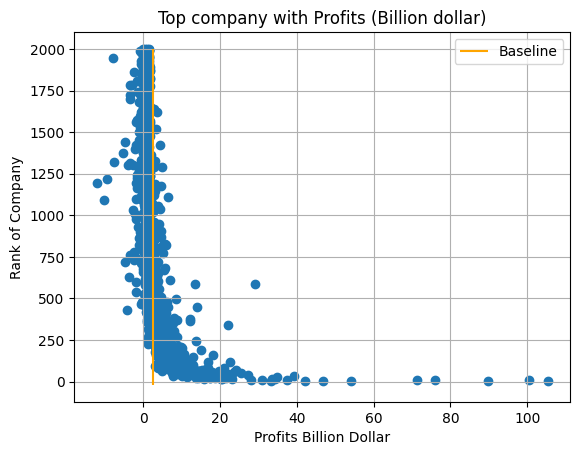

In [242]:

baseline = np.mean(df_company['Profits (B$)'].mean())
plt.scatter(df_company['Profits (B$)'], df_company.index)
plt.vlines(baseline, -20, 2000, color = 'orange', label="Baseline")

plt.legend(loc="upper right")
plt.title("Top company with Profits (Billion dollar)")
plt.xlabel('Profits Billion Dollar')
plt.ylabel('Rank of Company')
plt.grid()
plt.show()


#### Tính độ lỗi

Ta có __Sum of Squared Errors (SSE)__ là `tổng độ lỗi` để tính **SSE** ta tính tổng sai số của từng biến có trong `data` bằng các lấy `base line` trừ đi các giá trị trong `data` rồi bình phương lên (để luôn dương) rồi cộng các kết quả lại với nhau.</br>
Còn  __MSE là the Mean Squared Error__  nghĩa là `độ lỗi trung bình`, để tính **MSE** ta đơn giản lấy **SSE** chia cho n

$$ SSE = (y_{i} - \bar{y_{i}})^{2}$$


$$ MSE = \frac{SSE}{n} $$

In [243]:
SSE_baseline = np.sum((df_company['Profits (B$)'] - baseline)**2)
MSE_baseline = SSE_baseline / len(df_company)
print(f'SSE baseline = {SSE_baseline}')
print(f'MSE baseline = {MSE_baseline}')
print(f'accuracy = {100 - MSE_baseline}%')

SSE baseline = 75833.74540658377
MSE baseline = 37.91687270329189
accuracy = 62.08312729670811%


Độ chính xác khá thấp chỉ **62%** :(

#### Tính Liner Regression

Dựa vào kiến thức đã học từ môn Máy học ta tính được liner dựa vào `profits`

$$W = (\bar{X}^{T}\bar{X})^{\dagger} \bar{X}^{T}y$$

In [286]:
X = np.array([df_company['Profits (B$)']]).T
y = np.array([df_company.index]).T

w =  [[1103.87535568]
 [ -41.38781675]]


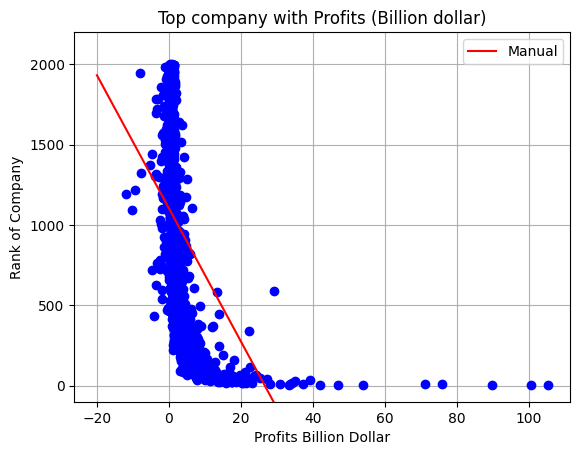

In [288]:
one = np.ones((X.shape[0], 1))
Xbar = np.concatenate((one, X), axis = 1)

# Calculating weights of the fitting line 
A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)
w = np.dot(np.linalg.pinv(A), b)
print('w = ', w)
# Preparing the fitting line 
w_0 = w[0][0]
w_1 = w[1][0]
x0 = np.linspace(-20, 100, 2)

y0 = w_0 + w_1*x0

# Drawing the fitting line 
plt.plot(X.T, y.T, 'bo')     # data 
plt.plot(x0, y0,color = 'red', label= "Manual")     
plt.legend(loc="upper right")   

plt.title("Top company with Profits (Billion dollar)")      # the fitting line
plt.xlabel('Profits Billion Dollar')
plt.ylabel('Rank of Company')
plt.ylim([-100,2200])
plt.grid()
plt.show()

Ta tính liner theo `sklearn` và so sánh kết quả các kết quả với nhau

In [246]:
from sklearn.linear_model import LinearRegression
X_train = df_company[['Profits (B$)']]
y_train = df_company.index

model = LinearRegression()
model.fit(X=X_train,y = y_train)
y3 = model.predict(X=X_train)
y3

array([-2612.75058846, -1132.30838332, -3256.74501709, ...,
        1101.67766261,  1065.33088194,  1088.32595293])

Vẽ biểu đồ và so sánh các thuật toán

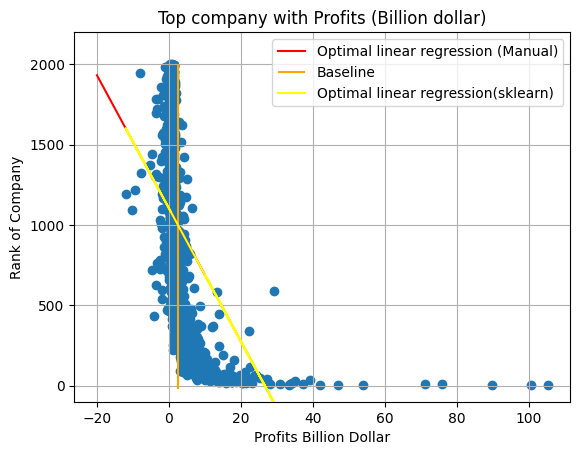

In [247]:
y2 = w_1 * x0 + w_0  # Tính từ kết quả ở trên
plt.scatter(df_company['Profits (B$)'], df_company.index)

plt.plot(x0,y2,label = "Optimal linear regression (Manual)",color = 'red')
plt.vlines(baseline, -20, 2000, color = 'orange', label="Baseline")
plt.plot(X_train,y3,label = "Optimal linear regression(sklearn)", color ='yellow')

plt.legend(loc="upper right")

plt.title("Top company with Profits (Billion dollar)")    
plt.xlabel('Profits Billion Dollar')
plt.ylabel('Rank of Company')

plt.ylim([-100,2200])

plt.grid()
plt.show()

Có vẻ như sklearn và thuật toán chúng ta làm cho ra kết quả giống nhau

Bây giờ ta dùng sklearn để tính dự đoán `profits` dựa trên các chỉ số còn lại

In [248]:
# X_train = df_company[['Sales (B$)','Profits (B$)','Assets (B$)','Market value (B$)']]
# y_train = df_company.index
# df_company['Rank'] = df_company.index
X_train = df_company[['Sales (B$)','Assets (B$)','Market value (B$)']]
y_train = df_company['Profits (B$)']

model = LinearRegression()
model.fit(X=X_train,y = y_train)
y4 = model.predict(X=X_train)
y4

array([38.05650373, 40.81673266, 92.61775025, ...,  0.50331884,
        0.40629671,  0.78777421])

In [249]:
predictedPrices = y4
SSE_SklearnV2 = np.sum((df_company.index - predictedPrices)**2)
MSE_SklearnV2 = SSE_SklearnV2/len(df_company)
RMSE_SklearnV2 = MSE_SklearnV2 ** 0.5
R2 = 1 - MSE_SklearnV2 / MSE_baseline;
print('RMSE of SklearnV2 is '+ str(RMSE_SklearnV2))
print('R2 of SklearnV2 is '+ str(R2))
print()

RMSE of SklearnV2 is 1154.0060731880828
R2 of SklearnV2 is -35121.35904516883



In [250]:
model.coef_

array([0.02937809, 0.00498033, 0.03406166])

In [251]:
model.intercept_

-0.08557743660093298

### Logistic Regression

#### Ta dự đoán Proifits
Dựa vào các công ty có sẵn ta dự đoán Profits sẽ có thể lớn hơn `base line` hay không với `base line` = __2.5B__

Ta vẽ các công ty có `Profits` > **2.5B** có màu xanh, ngược lại màu đỏ






In [252]:
colours = ['blue' if i > baseline else 'red' for i in df_company['Profits (B$)']]

Text(0.5, 0.98, 'Top company with Profits (Billion dollar)')

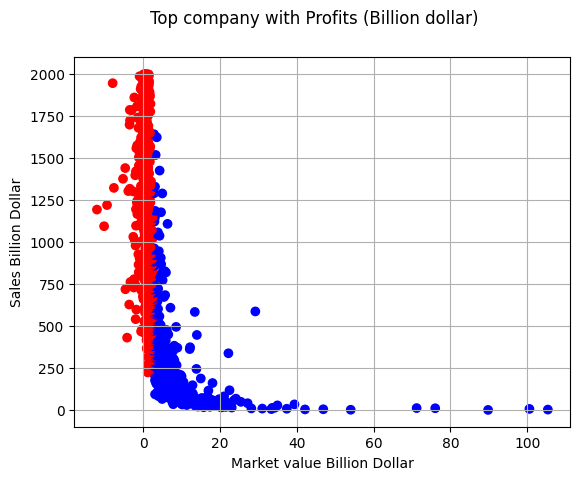

In [253]:
fig,ax = plt.subplots()
plt.scatter(df_company['Profits (B$)'], df_company.index, c=colours)
ax.grid(True)
ax.set_xlabel("Market value Billion Dollar")
ax.set_ylabel("Sales Billion Dollar")
fig.suptitle("Top company with Profits (Billion dollar)")

#### Công thức
$$ g(z) = \frac{1}{1 + e^{-z}}$$

Công thức chung cho nhiều tham số:  
  
$$P(y=1) = \frac{1}{1 + e^{-(\beta_{0} + \beta_{1} \cdot x_{1} + ... + \beta_{n} \cdot x_{n}) }} $$

In [254]:
def sigmoid(z):  
        return 1 / (1 + np.exp(-z))

Hiển thị hàm Sigmod

In [255]:
x = np.arange(-10., 10., 0.2)
sig = sigmoid(x)

Text(0.5, 0.98, 'The sigmoid function')

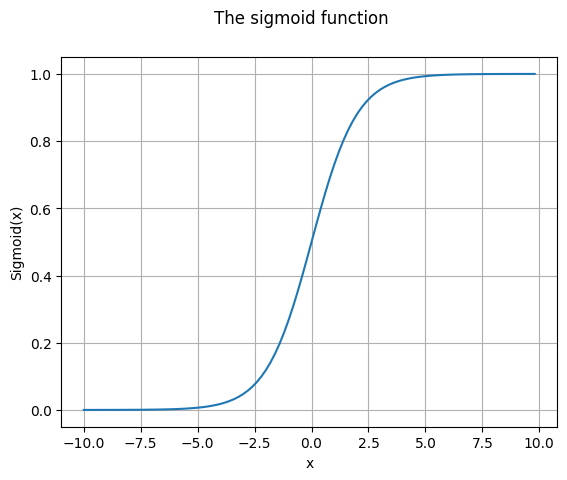

In [256]:
fig,ax = plt.subplots()
ax.plot(x,sig)
ax.grid(True)
ax.set_xlabel("x")
ax.set_ylabel("Sigmoid(x)")
fig.suptitle("The sigmoid function")

Ta phân chia dữ liệu nếu có `Profits` > **2.5B**
Ta cho dữ liệu là 1 ngược lại là 0

In [257]:
df_logistic = df_company.drop(['Profits (B$)','Name','Country'],axis =1)
df_logistic['Higher'] = [1 if i > baseline else 0 for i in df_company['Profits (B$)']]
df_logistic

,Sales (B$),Assets (B$),Market value (B$),Higher
Rank,,,,
1,276.090,958.780,741.48,1
2,208.130,5518.510,214.43,1
3,400.380,576.040,2292.08,1
4,124.540,3954.690,374.45,1
5,202.070,4746.950,181.32,1
...,...,...,...,...
1995,0.037,0.166,1.14,0
1997,3.520,5.710,6.40,0
1997,15.720,12.110,1.96,0


In [258]:
cols = df_logistic.shape[1]
cols

4

Theo $$P(y=1) = \frac{1}{1 + e^{-(\beta_{0} + \beta_{1} \cdot x_{1} + ... + \beta_{n} \cdot x_{n}) }} $$
ta sẽ có

In [259]:
def getCostGradient(w, X, y):
      # Initialize some useful values
    y = np.squeeze(y)  # this is to avoid broadcasting when element-wise multiply
    m = len(y) # number of training examples
    grad = np.zeros(w.shape) # grad should have the same dimensions as beta
    
      # Compute the partial derivatives and set grad to the partial
      #               derivatives of the cost w.r.t. each parameter in theta
      
    h = sigmoid(np.dot(X, w))
    
       # J cost function
    y0 = y * np.log(h)
    y1 = (1 - y) * np.log(1 - h)
    cost = -np.sum(y0 + y1) / m
    
       # gradient
    error = h - y
    grad = np.dot(error, X) / m

    return (cost, grad)

Thêm 1 cột toàn 1 vào data

In [260]:
df_logistic.insert(0, 'Ones', 1)

In [261]:
df_logistic

,Ones,Sales (B$),Assets (B$),Market value (B$),Higher
Rank,,,,,
1,1,276.090,958.780,741.48,1
2,1,208.130,5518.510,214.43,1
3,1,400.380,576.040,2292.08,1
4,1,124.540,3954.690,374.45,1
5,1,202.070,4746.950,181.32,1
...,...,...,...,...,...
1995,1,0.037,0.166,1.14,0
1997,1,3.520,5.710,6.40,0
1997,1,15.720,12.110,1.96,0


In [262]:
X = df_logistic.iloc[:,0:cols]  # the first columns but the last are X
X = np.array(X.values)

In [263]:
X[0:10]

array([[1.00000e+00, 2.76090e+02, 9.58780e+02, 7.41480e+02],
       [1.00000e+00, 2.08130e+02, 5.51851e+03, 2.14430e+02],
       [1.00000e+00, 4.00380e+02, 5.76040e+02, 2.29208e+03],
       [1.00000e+00, 1.24540e+02, 3.95469e+03, 3.74450e+02],
       [1.00000e+00, 2.02070e+02, 4.74695e+03, 1.81320e+02],
       [1.00000e+00, 4.69820e+02, 4.20550e+02, 1.46840e+03],
       [1.00000e+00, 3.78700e+02, 3.81190e+02, 2.64032e+03],
       [1.00000e+00, 1.81420e+02, 4.56105e+03, 1.33380e+02],
       [1.00000e+00, 9.68300e+01, 3.23822e+03, 3.03100e+02],
       [1.00000e+00, 2.81750e+02, 5.52460e+02, 2.37730e+02]])

In [264]:
y = df_logistic.iloc[:,cols:cols+1] # last column is the y
y = np.array(y.values) 

In [265]:
y[250:275]

array([[0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]])

In [266]:
initialBeta = np.zeros(cols) 

In [267]:
initialBeta

array([0., 0., 0., 0.])

In [268]:
getCostGradient(initialBeta, X, y)

(0.6931471805599454,
 array([  0.273     ,  -1.2871335 , -20.7805005 ,  -5.25634325]))

#### Fit the beta parameters
Sử dụng bằng thư viện

In [269]:
import scipy.optimize as opt  

In [270]:
result = opt.minimize(fun = getCostGradient,  x0 = initialBeta, args = (X, y),
                          method = 'Newton-CG',jac = True) 

<ipython-input-259-8fe9c8e2badc>:14: RuntimeWarning:

divide by zero encountered in log

<ipython-input-259-8fe9c8e2badc>:14: RuntimeWarning:

invalid value encountered in multiply

<ipython-input-259-8fe9c8e2badc>:14: RuntimeWarning:

divide by zero encountered in log

<ipython-input-259-8fe9c8e2badc>:14: RuntimeWarning:

invalid value encountered in multiply

<ipython-input-259-8fe9c8e2badc>:14: RuntimeWarning:

divide by zero encountered in log

<ipython-input-259-8fe9c8e2badc>:14: RuntimeWarning:

invalid value encountered in multiply

<ipython-input-259-8fe9c8e2badc>:14: RuntimeWarning:

divide by zero encountered in log

<ipython-input-259-8fe9c8e2badc>:14: RuntimeWarning:

invalid value encountered in multiply

<ipython-input-259-8fe9c8e2badc>:14: RuntimeWarning:

divide by zero encountered in log

<ipython-input-259-8fe9c8e2badc>:14: RuntimeWarning:

invalid value encountered in multiply

<ipython-input-259-8fe9c8e2badc>:14: RuntimeWarning:

divide by zero encountered in log

<

In [271]:
result.message

'NaN result encountered.'

In [272]:
optimalBeta = result.x

In [273]:
optimalBeta

array([-3.72879701,  0.02609833,  0.00510114,  0.04002984])

$$P(y=1) = \frac{1}{1 + e^{-3.7 + 0.4 \cdot x_{1} - 0.02 \cdot x_{2} - 0.05\cdot x_{3}}} $$

Chọn 2 diểm đầu và cuối để kết hợp sẽ cho kết quả có quả khả quan hơn

In [274]:
plot_x = np.array([min(X[:,2])-2, np.mean(X) ,max(X[:,2])+2])
plot_x

array([-1.83400000e+00,  4.50631264e+01,  5.52051000e+03])

In [275]:
plot_y = (-1./optimalBeta[3]) * (optimalBeta[2] * plot_x + optimalBeta[1])*(optimalBeta[1] * plot_x + optimalBeta[0])
plot_y

array([ 1.57962131e+00,  1.63234595e+01, -9.88255146e+04])

In [276]:
def predict(beta, X):  
    probabilities = sigmoid(np.dot(X, beta))
    return [1 if x >= 0.5 else 0 for x in probabilities]

In [277]:
predictions = predict(optimalBeta, X)

In [278]:
predictions[250:275]

[1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0]

In [279]:
y[250:275]

array([[0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]])

In [280]:
correct = [1 if a == b 
           else 0 for (a, b) in zip(predictions, y)] 

print ('accuracy = {0}%'.format(sum(correct)*100/len(y)))


accuracy = 89.0%


Test dữ liệu năm 2023 của công ty **TSMC**

In [281]:
tsmc = np.array([1,443.61,75.01,96.59])

In [282]:
sigmoid(np.dot(tsmc, optimalBeta))

0.9999944282767479

Khoảng **99.999%** công ty sẽ có lợi nhuận trên **2.5B**
Và thực tế nó đã đạt `Profits` = **25.10B** :)

Test dữ liệu năm 2023 của công ty **Universal Display Corporation**

In [283]:
udc = np.array([1,6.59,0.59,1.29])

In [284]:
sigmoid(np.dot(udc, optimalBeta))

0.029250809904649774

Máy dự đoán là **29%** `profits` > **2.5B**  và thực tế `Profits` = **0.25B**

### Nhận Xét 
`Liner Regression` cho độ chính xác không cao lắm khoảng **62%**.
Trong khi đó `Logictis Regression` cho khoảng **89%** độ chính xác cao hơn hẵn.
Tuy nhiên `Liner Regression` cho kết quả cụ thể tuy nhiên `Logictis Regression` chỉ cho kết quả trên hoặc dưới 1 khoảng nào đó. Trong 1 số trường hợp sẽ khó trực quan.
Nhìn chung cái nào cũng có ưu nhược điểm trong trường hợp này.

## Phần 3 Tổng hợp kết quả

Khó khăn gặp phải :
1.   Thu thập dữ liệu:

*   Lựa chọn dữ liệu phù hợp : có quá nhiều web và có quá nhiều dữ liệu, ta phải dữ liệu phù hợp.
*   Cách thức lấy dữ liệu, vì có nhiều cách dữ liệu, nhóm em đã thử lấy 3 cách khác nhau, tuy nhiên dữ liệu lỗi quá nhiều nên chọn cách này


2.   Trả lời câu hỏi : Lựa chọn câu hỏi, các câu hỏi từ dữ liệu rất nhiều, bọn em tốn rất nhiều thời gian để lựa chọn câu hỏi thích hợp với dữ liệu.

3. Phần máy học : Nhóm em đã thử biến đổi dữ liệu để làm mô hình máy học, có một số máy học không phù hợp, có một số máy học thực hiện được nhưng độ chính xác khá thấp và sau khi họp lại nhóm em đã loại ra.
